1. Read all the TSV files into an array, write a function to extract the title and authors data
2. Go through each TSV and use title and authors to search the OCLC for OWI number
3. Go through each OWI and get:
    3.1 Earliest year published
    3.2 Holdings
    3.3 For OWI with the most holdings: VIAF -> Genders
    3.5 For each OWI where "book" in .get("format")
    Make Genders -> DDC dict, add to it manually
4. Make a dict of TITLE/AUTHOR STRING -> OWI, YEAR_PUBLISHED, GENDER(S), TOP_DDC, FAST_LIST?

In [1]:
import csv, os
from datetime import datetime
f_filen = "tabula-1963-03-17.tsv"
nf_filen = "tabula-1963-03-17-nf.tsv"
data_i = 2 #How far into the tsv file the data shows up...
fields = ['rank','title+author','rank_last_week','weeks_on_list']
stop_words_authors = ["Others"]

# Read the Data In

In [87]:
def empty(row):
    if row[0]=="":
        return True
    return False 

def extract_date(datestr):
    try:
        date = datetime.strptime(datestr[0],'%B %d, %Y')
    except ValueError:
        date = datetime.strptime(datestr[0],'%B %d,%Y')
    return date

def extract_date_filen(datestr):
    f_from_path = datestr.split("/")[2]
    wo_extension = f_from_path.split(".")[0]
    date = datetime.strptime(wo_extension,'%Y-%m-%d')
    return date

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def header(row):
    if is_number(row[0]):
        return False
    else:
        return True
    
def read_tsv(name):
    i = 0
    arr = []
    date = ""
    with open(name) as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        previous_previous_row = ""
        previous_row = ""
        for row in reader:
            if (not empty(row)):
                if (header(row)) & (i>data_i):
                    return arr
                if i==0:
                    date_field = [row[1]]
                    if row[1] == "":
                        date_field = [row[2]]
                    try:
                        date = extract_date(date_field)
                    except:
                        date = extract_date_filen(name)
                if (i > data_i):
                    if row[1] == "":
                        row[1] = previous_row[1]
                    arr.append([date]+row)
                i = i+1
            previous_row = row
        return arr
    
def read_folder(folderpath):
    arr = []
    for f in os.listdir(folderpath):
        commasv = read_tsv(folderpath+f)
        arr = arr+commasv
    return arr

eighty_path = "tsvs/1980s/"
eighties = read_folder(eighty_path)
seventies_path = "tsvs/1970s/"
seventies = read_folder(seventies_path)
sixties_path = "tsvs/1960s/"
sixties = read_folder(sixties_path)
fifties_path = "tsvs/1950s/"
fifties = read_folder(fifties_path)

nineties = read_folder("tsvs/1990s/")
thousands = read_folder("tsvs/2000s/")

for x in nineties[0:10]:
    print x
    
    
to_process = fifties + sixties + seventies + eighties + nineties + thousands
print len(to_process)

[datetime.datetime(1996, 5, 19, 0, 0), '2', 'THE TENTH INSIGHT, by James Redfield. (Warner, $19.95.) A journey through', '3', '2']
[datetime.datetime(1996, 5, 19, 0, 0), '3', 'MOONLIGHT BECOMES YOU, by Mary Higgins Clark. (Simon & Schuster, $24.)', '1', '5']
[datetime.datetime(1996, 5, 19, 0, 0), '4', 'MALICE, by Danielle Steel. (Delacorte, $24.95.) A woman struggles to overcome', '2', '4']
[datetime.datetime(1996, 5, 19, 0, 0), '5', 'THE CELESTINE PROPHECY, by James Redfield. (Warner, $17.95.) An ancient', '5', '116']
[datetime.datetime(1996, 5, 19, 0, 0), '6', 'PRIMARY COLORS, by Anonymous. (Random House, $24.) The progress of a', '4', '15']
[datetime.datetime(1996, 5, 19, 0, 0), '7', 'TIMEPIECE, by Richard Paul Evans. (Simon & Schuster, $18.) By sharing grief', '7', '3']
[datetime.datetime(1996, 5, 19, 0, 0), '8', 'NEANDERTHAL, by John Darnton. (Random House, $24.) The discovery in', '12', '3']
[datetime.datetime(1996, 5, 19, 0, 0), '9', 'THE HORSE WHISPERER, by Nicholas Evans. (Del

# Get Title and Author

In [63]:
skip_these = set()

In [115]:
auth_i = 4

# strip trailing char if '.' or ' '
def strip_trailing_punct(a):
    last_char = a[len(a)-1]
    if (last_char != '.') & (last_char != ' '):
        return a
    b = a[:len(a)-1] 
    return strip_trailing_punct(b)


def parse_author_phrase(a_ph):
    authors = []
    end = len(a_ph)
    parens = a_ph.find("(")
    if parens != -1:
        end = parens-1
    auth_ph = a_ph[auth_i:end]
    if " and " in auth_ph:
        author_arr = auth_ph.split(" and ")
        for author in author_arr:
            author = strip_trailing_punct(author)
            if author not in stop_words_authors:
                authors.append(author)
    else:
        author = auth_ph
        author = strip_trailing_punct(author)
        authors.append(author)
    return authors

def title_author_pair(data_str):
    if data_str in from_pdf_dict:
        return from_pdf_dict[data_str]
    split_str = data_str.split(',')
    title = ""
    auth_ph = ""
    i=0
    t=True
    for phrase in split_str:    
        if i == 0:
            title = phrase
        else:
            if phrase.isupper() & t:
                title = title + ", "+phrase
            else:
                t = False
                auth_ph = auth_ph+phrase
        i = i+1
    try:
        authors = parse_author_phrase(auth_ph)
        if authors == []:
            authors = [data_str]
    except:
        skip_these.add(data_str)
        authors = [data_str]
    return (title,authors)

ta = set()
i = 0
for x in to_process:
    title = title_author_pair(x[2])
    if title[0] == "":
        print i
        print x
        i = i+1
        ta.add(str(title))
print "len ta = "+str(len(ta))
print len(thousands)


i =0 
for x in ta:
    print x
    i = i+1
    if i>10:
        break


len ta = 0
11499


In [6]:
print title_author_pair("THE LAST HURRAH, by Margaret Attenbourough. (gestated in utero.)")

('THE LAST HURRAH', ['Margaret Attenbourough'])


In [116]:
print skip_these

#from_pdf_dict = load_obj("from_pdf_manual.pickle")
   

set(['', 'UNKNOWN'])


In [62]:
for x in from_pdf_dict:
    print x + str(from_pdf_dict[x])

HIDDEN PASSIONS: Secrets From the Diaries of Tabitha Lenox.('HIDDEN PASSIONS: SECRETS FROM THE DIARIES OF TABITHA LENOX', ['Alice Alfonsi'])
MAGIC KINGDOM FOR SALE: Sold! by Terry Brooks. (Del Rey/Ballantine,('MAGIC KINGDOM FOR SALE: SOLD!', ['Terry Brooks'])
ALL THE LIGHT WE CANNOT SEE. by Anthony Doerr. (Scribner.) The lives of a('ALL THE LIGHT WE CANNOT SEE', ['Anthony Doerr'])
WHERE IS JOE MERCHANT? by Jimmy Buffett. (Harcourt Brace Jovanovich,('WHERE IS JOE MERCHANT?', ['Jimmy Buffett'])
WHAT'S HEAVEN? by Maria Shriver. Illustrated by Sandra Speidel. (Golden("WHAT'S HEAVEN?", ['Maria Shriver', 'Sandra Speidel'])
DISNEY'S BEAUTY AND THE BEAST. (Gallery Books/Penguin USA, $6.98.) A("DISNEY'S BEAUTY AND THE BEAST", ['Disney'])
AI! PEDRITO! by L. Ron Hubbard and Kevin J. Anderson. (Bridge Publications,('AI! PEDRITO!', ['L. Ron Hubbard', 'Kevin J. Anderson'])
THE COLLECTED STORIES OF EUDORA WELTY. (Harcourt Brace Jovanovich,('THE COLLECTED STORIES OF EUDORA WELTY', ['Eudora Welty'])
HI

In [53]:
testr1 = "1, 2, 3, 4"
testr2 = "1234"
print testr1.split(",")
print testr2.split(",")

['1', ' 2', ' 3', ' 4']
['1234']


# To OCLC


In [8]:
import xml.etree.ElementTree
import json,pickle
import urllib2
import re

oclc_base = "http://classify.oclc.org/classify2/Classify?"
alph = re.compile('[^a-zA-Z]')
suffixes = ['CPA', 'CSC', 'CSJ', 'DC', 'DD', 'DDS', 'DMD', 'DO', 'DVM', 'EDD', 'ESQ', 'II', 'III', 
            'IV', 'INC', 'JD', 'JR', 'LLD', 'LTD', 'MD', 'OD', 'OSB', 'PC', 'PE', 'PHD', 'RET', 
            'RGS', 'RN', 'RNC', 'SHCJ', 'SJ', 'SNJM', 'SR', 'SSMO', 'USA', 'USAF', 'USAFR', 'USAR', 
            'USCG', 'USMC', 'USMCR', 'USN', 'USNR']

In [9]:
def write_obj(obj,filename):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
        return b
    
ta_to_data_dict = load_obj("new_wave.pickle") 
#ta_to_data_dict = {}

In [10]:
def suffix(phrase):
    norm_phrase = phrase.replace(',',"").upper()
    if norm_phrase in suffixes:
        return True
    else:
        return False
    
def strip_punct(text):
    return alph.sub('', text)

def norm_text(text):
    return strip_punct(text).lower()

def url_to_data(url,f):
    req = urllib2.Request(url)
    req.add_header('User-agent', 'Mozilla 5.10')
    res = urllib2.urlopen(req)
    if(f=="xml"):
        data = xml.etree.ElementTree.parse(res).getroot()
    if(f=="json"):
        data = json.load(res)
    return data

def convert_to_search(name):
    return_string = ""
    last_ch = " "
    for ch in name:
        if (ch == " "):
            if (last_ch != "."):
                return_string = return_string + "+"
        else:
            if ch == ".":
                return_string = return_string +".+"
            else:
                return_string = return_string+ch
        last_ch = ch
    return return_string

def last_name_recursive(name,last_index):
    if last_index == 0:
        return ""
    last_phrase = name[last_index]
    if not suffix(last_phrase):
        return last_phrase
    else:
        return last_name_recursive(name, last_index-1)

def last_name(name):
    names = name.split(" ")
    last_index = len(names)-1
    last = last_name_recursive(names,last_index)
    return last

def first_name(name):
    names = name.split(" ")
    return names[0]

In [11]:
from lxml import html
from bs4 import BeautifulSoup
import requests

viaf_base = "http://www.viaf.org/viaf/"
    
def get_gender_scrape(i):
    url = viaf_base+str(i)+"/"
    data = requests.get(url).text
    soup = BeautifulSoup(data,"lxml")
    personal = soup.find('div',{'id':'personalinfo'})
    if personal is None:
        return ""
    h4s = personal.find('h4')
    if (h4s is None) or (len(h4s)<5):
        return ""
    mt = []
    i=0
    for h in h4s:
        mt.append(h)
        i = i+1
    return str(mt[4])

In [125]:
def is_book(w,t,a):
    if "book" in norm_text(w.get("format")):
        if norm_text(t) in norm_text(w.get("title")):
            for auth in a:
                if norm_text(last_name(auth)) in norm_text(w.get("author")):
                    if norm_text(first_name(auth))in norm_text(w.get("author")):
                        return True
    return False

def find_all_works(xml,title,authors):
    works = xml.find('{http://classify.oclc.org}works')
    if works is None:
        works = []
        works.append(xml.find('{http://classify.oclc.org}work'))
#        print works
        if (works is None) or works == []:
            return []
    books = []
    for w in works:
        holdings = w.get("holdings")
        if (int(holdings) > 10) & (is_book(w,title,authors)):
            owi = w.get("owi")
            try:
                lyr = w.get("lyr")
            except:
                lyr = ""
            books.append({"owi":owi,"holdings":holdings,"lyr":lyr})
    return books

def new_work(w, entries):
    if int(w['holdings']) < 50:
        return False
    for e in entries:
        if w['owi'] == e["owi"]:
             return False
    return True

def get_oclc_entries(title,authors):
    url = oclc_base +"title="+convert_to_search(title)
    #i = 0
    entries = []
    for a in authors:
        auth_url = url +"&author=" + last_name(a)
        xml = url_to_data(auth_url,"xml")
#        print xml
        try:
            works = find_all_works(xml,title,authors)
        except:
            return []
        if works is None:
            return []
        if entries == []:
            entries = works
        else:
            for w in works:
                if new_work(w,entries):
                    entries.append(w)
        #i = i+1
    return entries
    
print get_oclc_entries('BELOVED', ['Toni Barfblatt']) 
print get_oclc_entries('SEVEN DAYS IN MAY', ['Fletcher Knebel']) 

def max_holding(oarr):
    target = oarr[0]
    for o in oarr[1:]:
        if int(o['holdings'])>int(target['holdings']):
            target = o
    return target

def get_authors(xml):
    authors = xml.find('{http://classify.oclc.org}authors')
    target = []
    for a in authors:
        text = a.text
        v = a.get('viaf')
        target.append({'name':text, 'viaf':v})
    return target

def get_fast(xml):
    recs = xml.find('{http://classify.oclc.org}recommendations')
    target = []
    if recs is not None:
        fast = recs.find('{http://classify.oclc.org}fast')
        if fast is not None:
            headings = fast.find('{http://classify.oclc.org}headings')
            for h in headings:
                if int(h.get('heldby'))>10:
                    target.append(h.text)
    return target

def lookup_oclc(owi):
    url = oclc_base+"owi="+owi
    xml = url_to_data(url,"xml")
    try:
        v = get_authors(xml)
    except:
        print url
        print xml
        response_code = xml.find('{http://classify.oclc.org}response').get("code")
        if response_code == '102':
            print '102!'
    fast = get_fast(xml)
    target = {'authors':v,'fast':fast}
    return target

test_author_dict = [{'viaf': '22619695', 'name': 'Bailey, Charles Waldo, 1929-2012 [Author]'}, {'viaf': '19720195', 'name': 'Knebel, Fletcher'}]

def get_genders(authors, viaf_dict):
    target = []
    for a in authors:
        v = get_viaf(a,viaf_dict)
        gender = get_gender_scrape(v)
        target.append({"name":a,"viaf":v,"gender":gender})
    return target
    
def get_viaf(author, viaf_dict_arr):
    l = norm_text(last_name(author))
    f = norm_text(first_name(author))
    target = ""
    for v in viaf_dict_arr:
        if l in norm_text(v['name']):
            target = v['viaf']
            if f in norm_text(v['name']):
                return v['viaf']
    return target

#print(get_genders(["Fletcher Knebel","Charles W. Bailey II"],test_author_dict))


[]
[{'holdings': '2275', 'owi': '1380647', 'lyr': '1962'}, {'holdings': '82', 'owi': '1806398693', 'lyr': '1962'}]


In [117]:
skipped_ta = []
print len(ta_to_data_dict)

5592


In [118]:
def process_input_data(ta):       
    # if str(ta) not in ta_to_oclc_dict: CHECK FOR THIS OUTSIDE THE FN
    title = ta[0]
    author = ta[1]
    oclc = get_oclc_entries(title,author)
    if (oclc is None) or (len(oclc)<1):
        skipped_ta.append(ta)
        owi = []
        holdings = []
        year_pub = []
        fast_subjects = set()
        genders = []
    else:
        if len(oclc) == 1:
            primary = oclc[0]
            primary_data = lookup_oclc(primary['owi'])
            fast_subjects = set(primary_data['fast'])
        else:
            primary = max_holding(oclc)
            primary_data = lookup_oclc(primary['owi'])
            fast_subjects = set(primary_data['fast'])
            for o in oclc:
                if o['owi'] != primary['owi']:
                    other_data = lookup_oclc(o['owi'])
                    fast_subjects.update(other_data['fast'])
        owi = primary["owi"]
        year_pub = primary["lyr"]
        genders = get_genders(author, primary_data['authors'])
    return {"owi": owi, "year_pub": year_pub, "fast_subjects":fast_subjects, "genders":genders}

## need to add the original data (date, year, rankings) if this is the ultimate output
def process_raw_list(input_ls):
    #print "INPUT! "+ str(input_ls)
    target = []
    i = 0
    for row in input_ls:
        date = row[0]
        year = date.year
        if row[2] != "UNKNOWN":
            ta = title_author_pair(row[2])
            target_row = {"date":date,"title":ta[0],"authors":ta[1],"year":year}
            string_ta = str(ta)
            if string_ta in ta_to_data_dict:
                target_row.update(ta_to_data_dict[string_ta])
            else:
                try:
                    processed = process_input_data(ta)
                    target_row.update(processed)
                    ta_to_data_dict[string_ta] = processed
                    
                    j = len(ta_to_data_dict)
                    if ((j%25 == 0) or (i == (len(input_ls)-1))):
                        print j
                        write_obj(ta_to_data_dict,"new_wave.pickle")
                except:
                    target_row = {"date":date,"title":row[2],"authors":row[2],"year":year,"owi":"","year_pub":"","fast_subjects":[],"genders":[]}
                    if target_row not in skipped_ta:
                        skipped_ta.append(target_row)                        
        target.append(target_row)
        i = i+1
    return target

processed = process_raw_list(to_process)
print processed[0]

http://classify.oclc.org/classify2/Classify?owi=2409782529
<Element '{http://classify.oclc.org}classify' at 0x7fdefdeba750>
{'owi': '104466836', 'title': 'THE SILVER CHALICE', 'year': 1953, 'fast_subjects': set(['Historical fiction', 'Jesus Christ', 'Christian fiction', 'History of Biblical events', 'Grail', 'Bible.--New Testament', 'Last Supper']), 'year_pub': '1926', 'authors': ['Thomas B. Costain'], 'date': datetime.datetime(1953, 4, 19, 0, 0), 'genders': [{'gender': 'Male', 'viaf': '97749233', 'name': 'Thomas B. Costain'}]}


In [121]:
print len(skipped_ta)


def print_head(sset,limit):
    i = 0
    for s in sset:
        if i>limit:
            return
        print s
        i = i+1

empty_set = set()
for x in skipped_ta:
    empty_set.add(str(x))
print len(empty_set)

print_head(skipped_ta,50)

1
1
{'year_pub': '', 'owi': '', 'title': 'THE CITY OF MIRRORS, by Justin Cronin. (Ballantine.) The virals bent on', 'date': datetime.datetime(2016, 6, 19, 0, 0), 'genders': [], 'authors': 'THE CITY OF MIRRORS, by Justin Cronin. (Ballantine.) The virals bent on', 'year': 2016, 'fast_subjects': []}


In [101]:
import matplotlib
%matplotlib inline

genre_terms = ["fiction","stories","tales","literature","opera"]
genre_dict = {"romance":{"keys":["romance","erotic"],"stops":["language"]}, #took out 'domestic'
              "domestic":{"keys":["domestic"]},
              "suspense":{"keys":["suspense"]},
              "horror":{"keys":["horror","paranormal"]},
              "mystery":{"keys":["mystery","detective","crime"]},
              "spy_and_politics":{"keys":["spy ","politic"]},
              "fsf":{"keys":["fantasy","science fiction", "space","cyberpunk","steampunk"]},
              "adventure":{"keys":["adventure","western","sea "]},
              "ya":{"keys":["young adult"]},
              "war":{"keys":["war "]},
              "religious":{"keys":["religious","christian"],"stop":["aspects"]},
              "historical":{"keys":["historical"]} ## <-- I think this one might not be a well-supported
                                                   ## category in the DB
            }

def genre_candidate(fast_term):
    for term in genre_terms:
        if term in norm_text(fast_term):
            return True
    return False

def is_genre(fast_term,genre_str):
    terms = genre_dict[genre_str]['keys']
    if 'stops' in genre_dict[genre_str]:
        stops=genre_dict[genre_str]['stops']
    else:
        stops = []
    target = False
    for term in terms:
        if term in fast_term.lower():
            target = True
    for stop in stops:
        if stop in fast_term.lower():
            target = False
    return target

#def classify_genre(processed_row):
#    subjects = processed_row['fast_subjects']
def classify_genre(subjects):
    #print subjects
    target = {}
    for genre in genre_dict:
        target[genre]=0
    for subject in subjects:
        if genre_candidate(subject):
            for genre in genre_dict:
                if is_genre(subject,genre):
                    target[genre] = 1
    return target

def percent_genres(cl_ls):
    counts_dict = {}
    for genre in genre_dict:
        counts_dict[genre] = 0
    for x in cl_ls:
        for genre in genre_dict:
            counts_dict[genre] = counts_dict[genre]+x[genre]
    for genre in genre_dict:
        counts_dict[genre] = float(counts_dict[genre])/float(len(cl_ls))
    return counts_dict  

def tally_genres(cl_ls):
    counts_dict = {}
    for genre in genre_dict:
        counts_dict[genre] = 0
    for x in cl_ls:
        for genre in genre_dict:
            counts_dict[genre] = counts_dict[genre]+x[genre]
    return counts_dict  
    
def tally_genres_binned(cl_ls,group_val):
    df = pandas.DataFrame(cl_ls)
    grouped = df.groupby(group_val)
    target = []
    for group in grouped:
        classified = []
        index = group[0]
        ls_o_fast_lists = grouped.get_group(index)
        for fast_list in ls_o_fast_lists["fast_subjects"]:
            classified.append(classify_genre(fast_list))
        i = 0
        
        ## This is ugly, but I'm trying to figure out how to print the title of 
        ## books within a genre, the way I've done it. For spot-checking.
        
##        for c in classified:
##            if c["adventure"]==1:
##                print ls_o_fast_lists["title"][i]
            
        tallied = tally_genres(classified)
        tallied[group_val] = index
        target.append(tallied)
    return target

def percent_genres_binned(cl_ls,group_val):
    df = pandas.DataFrame(cl_ls)
    
    ## change the binning from average to sum
    df = df.drop_duplicates(["title","year"])
    
    grouped = df.groupby(group_val)
    target = []
    for group in grouped:
        classified = []
        index = group[0]
        ls_o_fast_lists = grouped.get_group(index)
        for fast_list in ls_o_fast_lists["fast_subjects"]:
            classified.append(classify_genre(fast_list))
        tallied = percent_genres(classified)
        tallied[group_val] = index
        target.append(tallied)
    return target

In [19]:
import pandas
print pandas.__version__

terms = []
for x in processed:
    for y in x['fast_subjects']:
        if genre_candidate(y):
            terms.append(y)
    
term_series = pandas.Series(terms)
counts = term_series.value_counts()
print len(processed)
print(counts)

0.19.2
44313
English fiction                                     3288
Detective and mystery stories                       3081
American fiction                                    2582
Adventure stories                                   1846
Romance fiction                                     1806
Domestic fiction                                    1624
Fiction                                             1586
Spy stories                                         1285
Historical fiction                                  1206
Suspense fiction                                    1192
Psychological fiction                                986
Science fiction                                      851
Legal stories                                        793
Horror tales                                         754
Fantasy fiction                                      739
War stories                                          631
Spanish fiction                                      630
Political fiction 

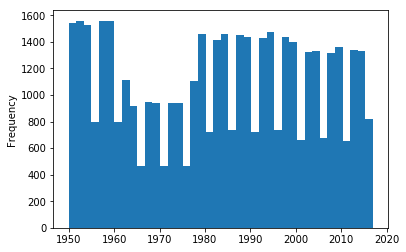

In [20]:
s = pandas.Series(pandas.DataFrame(processed)["year"])
s.plot(kind="hist",bins=40)

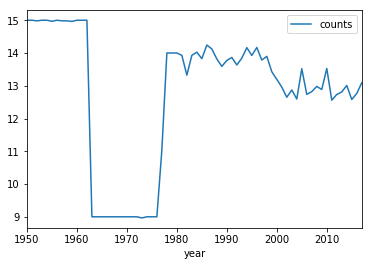

In [21]:
s = pandas.DataFrame(pandas.DataFrame(processed)[["year","date"]])
s['counts'] = s.groupby(['date']).transform('count')
s['counts'] = s['counts'].astype(int)
s_grouped = s.groupby("year")

fig_3 = s_grouped.mean().plot().get_figure()
fig_3.savefig("bestsellers_list_length.png")


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


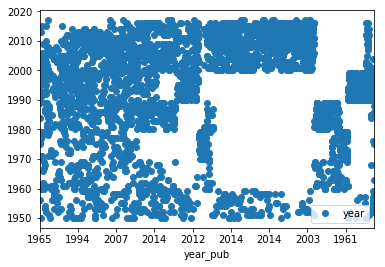

In [23]:
df = pandas.DataFrame(processed)
ndf = df[df.year_pub.notnull()]
ndf = ndf[ndf.year_pub != ""]
ndf = ndf[ndf.year_pub.str.len() != 0]
ndf["diff"] = ndf["year"] - ndf["year_pub"].astype(int)
ndf = ndf[ndf["diff"] < 50]
ndf = ndf.sort("diff",ascending = False)
ndf = ndf.drop_duplicates(["title","year_pub","diff"])
ndf.plot("year_pub","year", style='o')

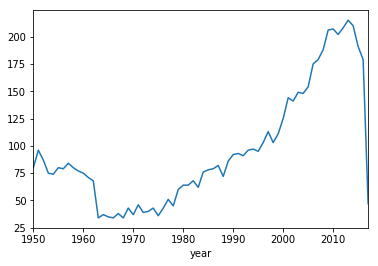

In [98]:
df = pandas.DataFrame(processed).groupby("year")
unique_counts = df.apply(unique_titles).apply(len)
fig = unique_counts.plot().get_figure()
fig.savefig("unique_titles_per_year2.png")

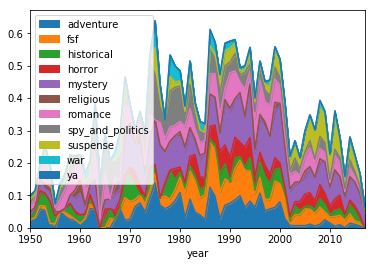

In [93]:
#tall_df = pandas.DataFrame(tally_genres_binned(processed,"year")).set_index("year")
#fig1 = tall_df.plot().get_figure()
#fig1.savefig("genre_tallies_year.png")

per_df = pandas.DataFrame(percent_genres_binned(processed,"year")).set_index("year")
fig = per_df.plot.area().get_figure()
fig.savefig("genre_percent_year3.png")

#tall_week_df = pandas.DataFrame(tally_genres_binned(processed,"date")).set_index("date")
#fig4 = tall_week_df.plot.area().get_figure()
#fig.savefig("by_week.png")

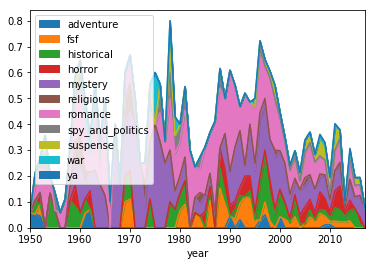

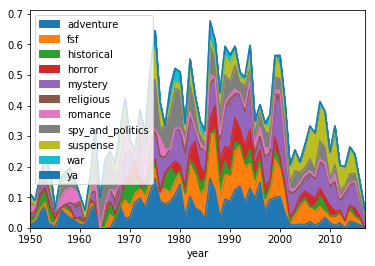

In [94]:
gendered = split_by_gender(processed)

genders = ["female","male"]

i = 0
for g in gendered:
    per_df = pandas.DataFrame(percent_genres_binned(g,"year")).set_index("year")
    fig = per_df.plot.area().get_figure()
    fig.savefig("genre_percent_year_"+genders[i]+"2.png")
    i = i+1

False
True
Female: 817
Male: 1505
0.351851851852
Female: 681
Male: 967
0.41322815534


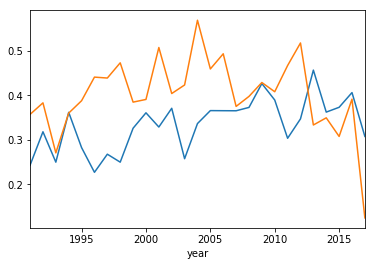

In [111]:
def is_any_genre(fast_ls):
    for x in fast_ls:
        for key in genre_dict:
#        key ="romance"
            if is_genre(x,key):
                return True
    return False

df = pandas.DataFrame(processed)
df = df.drop_duplicates(["title","year"])
df["is_genre"] = df["fast_subjects"].apply(is_any_genre)
df["gender"] = df["genders"].apply(class_gender)

ndf = percent_women_binned(df,"year")
df = df[df["year"].astype(int)>1990]

i = 0
grouped = df.groupby("is_genre")
for g in grouped:
    print g[0]
    p = percent_women_binned(g[1],"year")
    if i == 0:
        ax = pandas.DataFrame(p).set_index("year").plot(legend = False)
    else:
        pandas.DataFrame(p).set_index("year").plot(ax = ax,legend=False)
        fig = ax.get_figure()
        #fig.savefig("romance_v_not.png")
    i = i+1
    

grouped = df.groupby(["is_genre","gender"]).size()
grouped



i = 0
for x in grouped:
    if i%2 == 0:
        female = x
        print "Female: "+ str(female)
    else:
        male = x
        print "Male: "+ str(male)
        print float(female)/float(female+male)
    i = i+1



[1953 1953 1953 ..., 2004 2004 2004]
5588
Total: 2
Total: 955
Total: 823


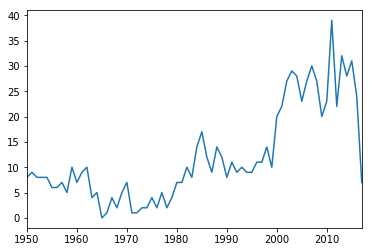

In [97]:
df = pandas.DataFrame(processed)

years = df["year"].values
print years

def init_year_dict(ls):
    df = pandas.DataFrame(ls)
    years = df["year"].values
    target = {}
    for y in years:
        target[y] = 0
    return target

def count_values(ls,column,to_count):
    target = init_year_dict(ls)
    i = 0
    if to_count == []:
        for item in ls:
            if len(item[column]) == 0:
                year = item["year"]
                target[year] = target[year]+1
                i = i+1
    else:
        for item in ls:
            if (item[column] is to_count):
                year = item["year"]
                target[year] = target[year]+1
                i = i+1
    print "Total: "+ str(i)
    return target

unique_ta = []
unique_processed = []
i=0
for x in processed:
#    if i < 25:
#        print x
    ta = (x["title"],x["authors"])
    if ta not in unique_ta:
        unique_ta.append(ta)
        unique_processed.append(x)
#    i = i+1

print len(unique_ta)
        
empties = count_values(unique_processed,"owi","")
empties = count_values(unique_processed,"fast_subjects",[])
empties = count_values(unique_processed,"genders",[])
#print len(processed)
s = pandas.Series(empties)
s.plot()
s

def get_empties(ls,field):
    target = []
    for x in ls:
        if len(x[field]) == 0:
            target.append(x)
    return target

def fill_manual_dict(orig_ls,failed_field,target):
    target = []
    empties = get_empties(orig_ls,failed_field)
    for e in empties:
        print e
    return target
    

In [22]:
def csv_str(ls,delim):
    target = ""
    i = 0
    for x in ls:
        target = target + str(x)
        if (i == (len(ls)-1)):
            target = target + "\n"
        else:
            target = target + str(delim)
        i = i+1
    return target

def export_to_csv_for_viz(df,filename):
    ls = csv_format_arr(df)
    with open(filename, 'w') as f:
        for row in ls:
            f.write(csv_str(row,','))
    
def csv_format_arr(df):
    target = []
    for genre in per_df:
        print(genre)
        year_ls = per_df[genre]
        print type(year_ls)
        for year in year_ls.index.values:
            row = [year,genre]
            row.append(year_ls[year])
            target.append(row)
    return target

per_df
print export_to_csv_for_viz(per_df,"potatoe1s.csv") 

adventure
<class 'pandas.core.series.Series'>
fsf
<class 'pandas.core.series.Series'>
historical
<class 'pandas.core.series.Series'>
horror
<class 'pandas.core.series.Series'>
mystery
<class 'pandas.core.series.Series'>
religious
<class 'pandas.core.series.Series'>
romance
<class 'pandas.core.series.Series'>
spy_and_politics
<class 'pandas.core.series.Series'>
suspense
<class 'pandas.core.series.Series'>
war
<class 'pandas.core.series.Series'>
ya
<class 'pandas.core.series.Series'>
None


In [105]:
titles = ['A WIDOW FOR ONE YEAR','OF LOVE AND OTHER DEMONS','DANIEL MARTIN']

def books_in_genre(data,genre):
    target = set()
    for x in data:
        for f in x["fast_subjects"]:
            if genre_candidate(f) and is_genre(f,genre):
                if (x["title"] in titles) & (str((x["title"],x["authors"])) not in target):
                    print x["title"] + ' ' + f
                target.add(str((x["title"],x["authors"])))
    return target

fsf = books_in_genre(processed,"fsf")
mystery = books_in_genre(processed,"mystery")
war = books_in_genre(processed,"war") 
domestic = books_in_genre(processed,"domestic")
romance = books_in_genre(processed,"romance")
both = domestic.intersection(romance)


#print "WAR"
#print_head(war, 20)
#print "SPIES"
#print_head(spy, 20)
print "ROMANCE"
print_head(domestic, 20)
print len(domestic)


A WIDOW FOR ONE YEAR Romance fiction
ROMANCE
('THE STORY OF EDGAR SAWTELLE', ['David Wroblewski'])
('THE CAROUSEL', ['Belva Plain'])
('THE WOMAN NEXT DOOR', ['Barbara Delinsky'])
('FAMILY TIES', ['Danielle Steel'])
('FAMILY TREE', ['Barbara Delinsky'])
('EVERY LAST ONE', ['Anna Quindlen'])
('A WOMAN OF SUBSTANCE', ['Barbara Taylor Bradford'])
('UNEXPECTED BLESSINGS', ['Barbara Taylor Bradford'])
('COAST ROAD', ['Barbara Delinsky'])
('THE WAR BETWEEN THE TATES', ['Alison Lurie'])
('RICH MAN,  POOR MAN', ['Irwin Shaw'])
('THE SHELL SEEKERS', ['Rosamunde Pilcher'])
('AND THE MOUNTAINS ECHOED', ['Khaled Hosseini'])
('GOD IS AN ENGLISHMAN', ['R.F. Delderfield'])
('SUNSET IN ST. TROPEZ', ['Danielle Steel'])
('THE HOURS', ['Michael Cunningham'])
('A PERFECT DAY', ['Richard Paul Evans'])
('A DAY LATE AND A DOLLAR SHORT', ['Terry McMillan'])
('THE ESTABLISHMENT', ['Howard Fast'])
('DADDY', ['Danielle Steel'])
('ATONEMENT', ['Ian McEwan'])
185


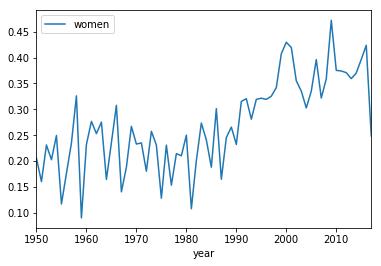

In [24]:
def split_by_gender(processed_ls):
    male = []
    female = []
    for row in processed_ls:
        gender = class_gender(row["genders"])
        if gender == "Female":
            female.append(row)
        if gender == "Male":
            male.append(row)
    return (female,male)

def percent_women_binned(cl_ls,group_val):
    df = pandas.DataFrame(cl_ls)
    grouped = df.groupby(group_val)
    target = []
    for group in grouped:
        new_row = {}
        classified = []
        index = group[0]
        g = grouped.get_group(index)
        for authors in g["genders"]:
            classified.append(class_gender(authors))
        new_row["women"] = percent_women(classified)
        new_row[group_val] = index
        target.append(new_row)
    return target

def class_gender(gender_ls):
    target = 'NA'
    for x in gender_ls:
        if x['gender'] == 'Female': ## THIS TREATS MIXED GENDER TEAMS AS FEMALE
            return 'Female'
    return 'Male'

def percent_women(class_ls):
    i = 0
    for x in class_ls:
        if x == "Female":
            i = i+1
    return float(i)/float(len(class_ls))
            
            
#for x in grouped:
#    index = x[0]
#    group = grouped.get_group(index)
#    print str(index) + str(num_titles(group))

tall_df = pandas.DataFrame(percent_women_binned(processed,"year")).set_index("year")
fig = tall_df.plot().get_figure()
fig.savefig("women_average_week2.png")

#fig.savefig("women2")


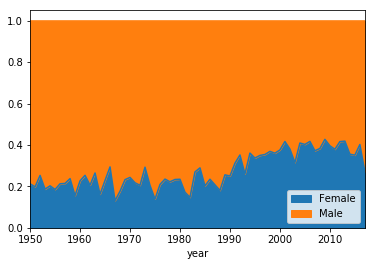

In [95]:
def unique_titles(df_ls):
    ta = set()
    ls = df_ls["title"]
    for x in ls:
        ta.add(x)
    return ta

def num_titles(ls):
    return len(unique_titles(ls))

def count_women_unweighted(ls,group_val):
    new_df = pandas.DataFrame(ls)
    new_df["genders"] = new_df["genders"].apply(class_gender)
    grouped =  new_df.groupby([group_val,"genders"]).apply(num_titles)
    temp = {}
    for index in grouped.index.values:
        year = index[0]
        if year in temp:
            row = temp[year]
        else:
            row = {}
        gender = index[1]
        row[gender] = grouped[index]
        temp[year] = row
    target = []
    for key in temp:
        new_row = {}
        new_row["year"] = key
        menn = temp[key]["Male"]
        womenn = temp[key]["Female"]
        new_row["Male"] = float(menn)/float(menn+womenn) # SCALING
        new_row["Female"] = float(womenn)/float(menn+womenn) # SCALING
        target.append(new_row)
    return target

df = pandas.DataFrame(count_women_unweighted(processed,"year")).set_index("year")
womens_fig = df.plot.area().get_figure()
womens_fig.savefig("womens_fig_scaled2.png")

{'COME POUR THE WINE,  $12.95.) A': 'COME POUR THE WINE', 'THE CRADLE WILL FALL,  $10.95.) A': 'THE CRADLE WILL FALL', 'Norman Mailler': 'Norman Mailer', 'THE TENTH COMMANDMENT,  $11.95.) A': 'THE TENTH COMMANDMENT', 'THE SECOND COMING,  $12.95.) A': 'THE SECOND COMING'}
